In [2]:

#read in txt file and split on '|', note the space before and after the '|'

f = open("AviationData.txt", "r")
reader = f.read()
aviation_data = reader.split("\n")
aviation_list = [row.split(" | ") for row in aviation_data]

#playing with different search loops using code below as the search value
code = 'LAX94LA336'

#loop through each row and column for `code`.  This is O(n^2)
lax_code =[]
for i in range(len(aviation_list)):
    for j in range(len(aviation_list[i])):
        if aviation_list[i][j] == code:
            lax_code.append(aviation_list[i])

print('Data for {}:'.format(code),'\n',lax_code,'\n',25*'-','\n')

#perform linear search O(n)
lax_code2 = []
for row in aviation_list:
    for value in row:
        if value == code:
            lax_code2.append(row)

print('Data for {}:'.format(code),'\n',lax_code2,'\n',25*'-','\n')

#create dictionary where key is the column name and value is the columns values
aviation_dict_list = []
column_names = aviation_data[0].split(' | ')
aviation_data2 = aviation_data[1:]

for row in aviation_data2:
    split = row.split(' | ')
    dict = {}
    for i in range(len(split)):
        dict[column_names[i]] = split[i]
    aviation_dict_list.append((dict))

#search dictionary for code like about searches
lax_dict = []
for d in aviation_dict_list:
    if code in d.values():
        lax_dict.append(d)

print('Data for {} using dictionary search:'.format(code),'\n',lax_dict,'\n',25*'-','\n')

#count accidents by state and print top 3 states
from collections import Counter
import pandas as pd
pd.options.display.max_rows=100

aviation_df = pd.DataFrame(aviation_list[1:],columns=aviation_list[0])
aviation_df.fillna('0',inplace=True)
#create df for United States
aviation_us = aviation_df[aviation_df.Country == 'United States'].copy()
aviation_us['Location']=aviation_us['Location'].str.split()
aviation_us['Location']=aviation_us['Location'].str[-1]
counts = Counter(aviation_us['Location'])

print('Top three states with the most accidents:','\n',25*'-','\n',counts.most_common(3),'\n',25*'-','\n')

#Split date and keep only month and year MM/YYYY
aviation_df['Event Date'] = aviation_df['Event Date'].str.split('/').str[0] + '/' + aviation_df['Event Date'].str.split('/').str[-1]

#loop through unique months and calc serious, fatal, total injuries for each month
month_year = aviation_df['Event Date'].unique()
monthly_injuries = pd.DataFrame()
serious_tot = []
fatal_tot = []


#convert to integer
cols = ['Total Serious Injuries','Total Fatal Injuries']
for col in cols:
    aviation_df[col].replace({'':'0'},inplace=True)
    aviation_df[col]=aviation_df[col].astype('int')

for my in month_year:
    df = aviation_df[aviation_df['Event Date'] == my]
    serious = df['Total Serious Injuries'].sum()
    fatal = df['Total Fatal Injuries'].sum()
    serious_tot.append((serious))
    fatal_tot.append(fatal)
monthly_injuries['month_year'] = month_year
monthly_injuries['total_serious'] = serious_tot
monthly_injuries['total_fatal'] = fatal_tot
monthly_injuries['total_injuries'] = monthly_injuries['total_serious'] + monthly_injuries['total_fatal']

print('Top five months with highest total injuries','\n',25*'-','\n')
print(monthly_injuries.sort_values(by='total_injuries',ascending=False).head())

#Count the number of accidents by air carrier.
df_carrier = aviation_df[aviation_df['Air Carrier']!=''].copy()
df_carrier['Air Carrier'] = df_carrier['Air Carrier'].str.lower()
counts_air = Counter(df_carrier['Air Carrier'])
print("The top three Air Carriers with the most accidents are:", '\n', counts_air.most_common(3),'\n',25*'-','\n')

#Count the number of accidents by airplane make and model
aviation_df['Make'] = aviation_df['Make'].str.lower()
aviation_df['Model'] = aviation_df['Model'].str.lower()
aviation_df['make_model'] = aviation_df['Make'] + '_' + aviation_df['Model']
counts_make = Counter(aviation_df['Make'])
counts_make_model = Counter(aviation_df['make_model'])
print("The top three airplane makes with the most accidents are:", '\n', counts_make.most_common(3),'\n',25*'-','\n')
print("The top three airplane make_model with the most accidents are:", '\n', counts_make_model.most_common(3),'\n',25*'-','\n')

#Figure out what percentage of accidents occur under adverse weather conditions
vmc = len(aviation_df[aviation_df['Weather Condition'] == 'VMC'])
imc = len(aviation_df[aviation_df['Weather Condition'] == 'IMC'])
tot = len(aviation_df['Weather Condition'])
unk = tot - imc -vmc
print('There were {} VMC, sufficient visibility, accidents or {:.2f}%'.format(vmc, (vmc/tot)*100),'\n')
print('There were {} IMC, cloudy or bad weather, accidents or {:.2f}%'.format(imc,(imc/tot)*100),'\n')
print('There were {} accidents with unknown weather conditions reported or {:.2f}%'.format(unk,(unk/tot)*100),'\n')

Data for LAX94LA336: 
 [['20001218X45447', 'Accident', 'LAX94LA336', '07/19/1962', 'BRIDGEPORT, CA', 'United States', '', '', '', '', 'Fatal(4)', 'Destroyed', '', 'N5069P', 'PIPER', 'PA24-180', 'No', '1', 'Reciprocating', '', '', 'Personal', '', '4', '0', '0', '0', 'UNK', 'UNKNOWN', 'Probable Cause', '09/19/1996', '']] 
 ------------------------- 

Data for LAX94LA336: 
 [['20001218X45447', 'Accident', 'LAX94LA336', '07/19/1962', 'BRIDGEPORT, CA', 'United States', '', '', '', '', 'Fatal(4)', 'Destroyed', '', 'N5069P', 'PIPER', 'PA24-180', 'No', '1', 'Reciprocating', '', '', 'Personal', '', '4', '0', '0', '0', 'UNK', 'UNKNOWN', 'Probable Cause', '09/19/1996', '']] 
 ------------------------- 

Data for LAX94LA336 using dictionary search: 
 [{'Event Id': '20001218X45447', 'Investigation Type': 'Accident', 'Accident Number': 'LAX94LA336', 'Event Date': '07/19/1962', 'Location': 'BRIDGEPORT, CA', 'Country': 'United States', 'Latitude': '', 'Longitude': '', 'Airport Code': '', 'Airport Name

In [42]:
counts_us = Counter(aviation_us['Location'])
counts_us_df=pd.DataFrame.from_dict(counts_us,orient = 'index')
counts_us_df.head()

,0
IL,1874
NH,326
SD,393
CA,8030
NJ,1068


In [40]:
aviation_us['Location'].isnull().sum()
aviation_us['Location'].dropna(inplace=True)

0

In [64]:
counts_us_df.rename(columns={'0':'col'},inplace=True)
top_5_states = counts_us_df.sort_values(by=0, ascending=False).head()

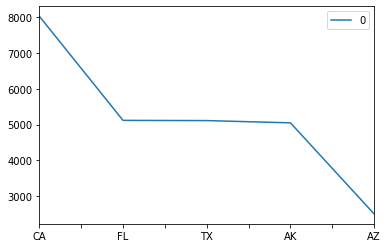

In [65]:
top_5_states.plot()